In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

In [3]:
df = pd.read_csv('kddcup.csv', names=names)

In [4]:
df.shape

(494021, 42)

In [5]:
# Divide by class 
df_normal = df[df['target'] == 'normal.']
df_neptune = df[df['target'] == 'neptune.']
df_back = df[df['target'] == 'back.']
df_teardrop = df[df['target'] == 'teardrop.']
df_satan = df[df['target'] == 'satan.']
df_warezclient = df[df['target'] == 'warezclient.']
df_ipsweep = df[df['target'] == 'ipsweep.']
df_smurf = df[df['target'] == 'smurf.']
df_portsweep = df[df['target'] == 'portsweep.']
df_pod = df[df['target'] == 'pod.']
df_nmap = df[df['target'] == 'nmap.']
df_guess_passwd = df[df['target'] == 'guess_passwd.']
df_buffer_overflow = df[df['target'] == 'buffer_overflow.']
df_warezmaster = df[df['target'] == 'warezmaster.']
df_land = df[df['target'] == 'land.']
df_imap = df[df['target'] == 'imap.']
df_rootkit = df[df['target'] == 'rootkit.']
df_loadmodule = df[df['target'] == 'loadmodule.']
df_ftp_write = df[df['target'] == 'ftp_write.']
df_multihop = df[df['target'] == 'multihop.']
df_phf = df[df['target'] == 'phf.']
df_perl = df[df['target'] == 'perl.']
df_spy = df[df['target'] == 'spy.']

In [6]:
df = pd.concat([df_normal, df_neptune, df_smurf], axis=0)

In [7]:
df.drop('num_outbound_cmds', axis=1, inplace=True)
df.drop('is_host_login', axis=1, inplace=True)
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
df['target'] = df['target'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [8]:
data = df.values
Y = data[:,39]
X = data[:,0:39]
Y = Y.reshape(-1, 1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)
pca = PCA(n_components=2)
rescaleX = pca.fit_transform(rescaleX)
rescaleX = np.append(rescaleX, Y, axis=1)
principalDf = pd.DataFrame(data = rescaleX, columns = ['principal component 1', 'principal component 2', 'target'])
principalDf.head()

,principal component 1,principal component 2,target
0,0.560535,1.428892,1.0
1,0.561570,1.404603,1.0
2,0.541429,1.380527,1.0
3,0.514420,1.354879,1.0
4,0.488805,1.329318,1.0


In [9]:
principalDf.target.value_counts()

2.0    280790
0.0    107201
1.0     97278
Name: target, dtype: int64

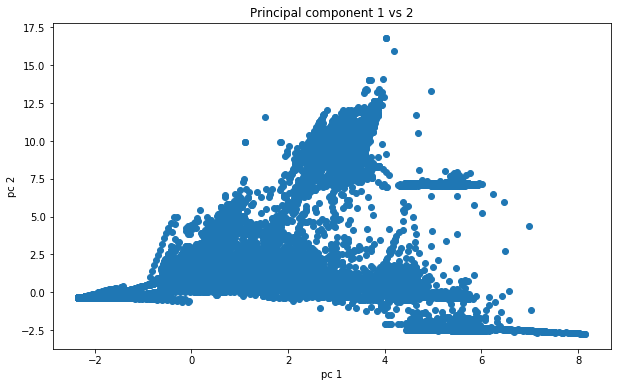

In [110]:
plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1])
plt.title('Principal component 1 vs 2')
plt.xlabel("pc 1")
plt.ylabel("pc 2")
plt.show()

In [10]:
data = principalDf.values

In [11]:
label = data[:,2]

In [12]:
principalDf.target.value_counts()

2.0    280790
0.0    107201
1.0     97278
Name: target, dtype: int64

In [13]:
names = ['neptune', 'normal', 'smurf']

In [14]:
names

['neptune', 'normal', 'smurf']

In [15]:
range(len(names))

range(0, 3)

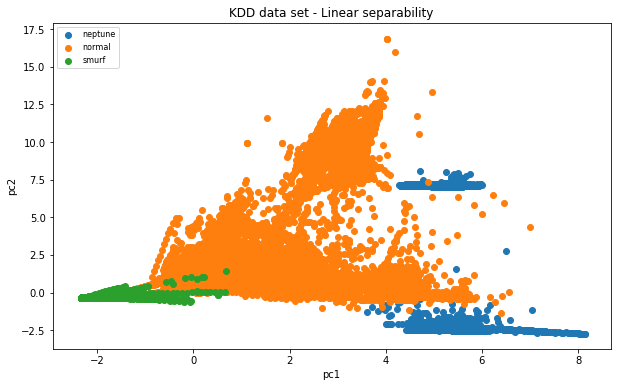

In [16]:
plt.clf()
plt.figure(figsize = (10, 6))
#markers = ['o', 's']
#label = numpy array of target column
plt.title('KDD data set - Linear separability')
plt.xlabel('pc1')
plt.ylabel('pc2')
for i in range(len(names)):
    bucket = principalDf[principalDf['target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend(loc='upper left',
           fontsize=8)
plt.show()

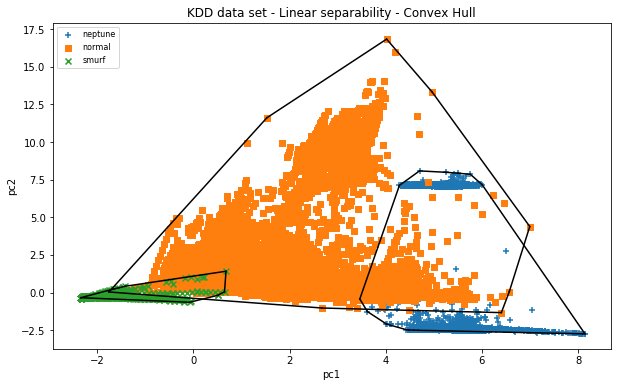

In [20]:
from scipy.spatial import ConvexHull
 
plt.clf()
plt.figure(figsize = (10, 6))
plt.title('KDD data set - Linear separability - Convex Hull')
plt.xlabel('pc1')
plt.ylabel('pc2')
markers = ['+', 's', 'x']
for i in range(len(names)):
    bucket = principalDf[principalDf['target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i], marker=markers[i]) 
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], color='#000000')
plt.legend(loc='upper left',
           fontsize=8)
plt.show()